#### Import Libraries 

In [2]:
#Import Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import metrics

In [90]:
#Read the training data
dataset = pd.read_csv('Train.csv')
X_test = pd.read_csv('Test.csv')

##### Training Dataset Dimensions

In [38]:
dataset.head()

,pickup_datetime,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y
0,2034-06-07 20:47:29,1,434,135.428113,321.190773,141.317712,321.357802
1,2034-04-14 08:00:21,1,415,148.781291,322.565536,157.145868,337.052655
2,2034-04-20 18:57:16,2,398,124.000006,313.347763,131.362606,300.613585
3,2034-04-28 22:40:52,1,746,124.288413,316.495404,143.284351,334.542116
4,2034-05-28 11:39:56,1,102,177.344861,358.087844,168.709489,363.038196


##### Test Dataset Dimensions

In [39]:
X_test.head()

,pickup_datetime,NumberOfPassengers,pickup_x,pickup_y,dropoff_x,dropoff_y
0,2034-03-14 08:28:17,2,155.108652,322.284140,148.058424,332.814003
1,2034-04-20 09:04:41,1,146.628808,306.343423,154.284090,339.899155
2,2034-01-25 00:46:04,2,132.028079,319.183942,149.318583,384.810789
3,2034-02-01 22:20:46,2,175.776769,344.277029,159.039740,311.756787
4,2034-04-15 23:29:21,2,128.428489,295.153348,126.011933,309.548102


In [40]:
X_test.isnull().sum()

pickup_datetime       0
NumberOfPassengers    0
pickup_x              0
pickup_y              0
dropoff_x             0
dropoff_y             0
dtype: int64

##### Summary of Train Set

In [41]:
#Summary of Train Set
print("A view of the test dataframe")
print(dataset.head())
print("\nColumns in test dataset : ", dataset.columns)
print("\n")
print("Overall description of the train dataset : ")
print(dataset.info())

A view of the test dataframe
       pickup_datetime  NumberOfPassengers  duration    pickup_x    pickup_y  \
0  2034-06-07 20:47:29                   1       434  135.428113  321.190773   
1  2034-04-14 08:00:21                   1       415  148.781291  322.565536   
2  2034-04-20 18:57:16                   2       398  124.000006  313.347763   
3  2034-04-28 22:40:52                   1       746  124.288413  316.495404   
4  2034-05-28 11:39:56                   1       102  177.344861  358.087844   

    dropoff_x   dropoff_y  
0  141.317712  321.357802  
1  157.145868  337.052655  
2  131.362606  300.613585  
3  143.284351  334.542116  
4  168.709489  363.038196  

Columns in test dataset :  Index(['pickup_datetime', 'NumberOfPassengers', 'duration', 'pickup_x',
       'pickup_y', 'dropoff_x', 'dropoff_y'],
      dtype='object')


Overall description of the train dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns

##### Summary of Test Set

In [42]:
#Summary of Test Set
print("A view of the test dataframe")
print(X_test.head())
print("\nColumns in test dataset : ", X_test.columns)
print("\n")
print("Overall description of the train dataset : ")
print(X_test.info())

A view of the test dataframe
       pickup_datetime  NumberOfPassengers    pickup_x    pickup_y  \
0  2034-03-14 08:28:17                   2  155.108652  322.284140   
1  2034-04-20 09:04:41                   1  146.628808  306.343423   
2  2034-01-25 00:46:04                   2  132.028079  319.183942   
3  2034-02-01 22:20:46                   2  175.776769  344.277029   
4  2034-04-15 23:29:21                   2  128.428489  295.153348   

    dropoff_x   dropoff_y  
0  148.058424  332.814003  
1  154.284090  339.899155  
2  149.318583  384.810789  
3  159.039740  311.756787  
4  126.011933  309.548102  

Columns in test dataset :  Index(['pickup_datetime', 'NumberOfPassengers', 'pickup_x', 'pickup_y',
       'dropoff_x', 'dropoff_y'],
      dtype='object')


Overall description of the train dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
pickup_datetime       200000 non-null object
NumberOfPassengers    200

##### Format Date Time for pickup_datetime - Training Set Data

In [4]:
#Pick-off and Drop-off Column from Training Set Data
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])


dataset['pickup_day'] = dataset['pickup_datetime'].dt.day
dataset['pickup_month'] = dataset['pickup_datetime'].dt.month
dataset['pickup_weekday'] = dataset['pickup_datetime'].dt.weekday
dataset['pickup_hour'] = dataset['pickup_datetime'].dt.hour

In [44]:
dataset.head()

,pickup_datetime,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_day,pickup_month,pickup_weekday,pickup_hour
0,2034-06-07 20:47:29,1,434,135.428113,321.190773,141.317712,321.357802,7,6,2,20
1,2034-04-14 08:00:21,1,415,148.781291,322.565536,157.145868,337.052655,14,4,4,8
2,2034-04-20 18:57:16,2,398,124.000006,313.347763,131.362606,300.613585,20,4,3,18
3,2034-04-28 22:40:52,1,746,124.288413,316.495404,143.284351,334.542116,28,4,4,22
4,2034-05-28 11:39:56,1,102,177.344861,358.087844,168.709489,363.038196,28,5,6,11


##### Format Date Time for pickup_datetime - Test Set Data

In [5]:
#Pick-off and Drop-off Column from Training Set Data
X_test['pickup_datetime'] = pd.to_datetime(X_test['pickup_datetime'])


X_test['pickup_day'] = X_test['pickup_datetime'].dt.day
X_test['pickup_month'] = X_test['pickup_datetime'].dt.month
X_test['pickup_weekday'] = X_test['pickup_datetime'].dt.weekday
X_test['pickup_hour'] = X_test['pickup_datetime'].dt.hour

In [46]:
X_test.head()

,pickup_datetime,NumberOfPassengers,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_day,pickup_month,pickup_weekday,pickup_hour
0,2034-03-14 08:28:17,2,155.108652,322.284140,148.058424,332.814003,14,3,1,8
1,2034-04-20 09:04:41,1,146.628808,306.343423,154.284090,339.899155,20,4,3,9
2,2034-01-25 00:46:04,2,132.028079,319.183942,149.318583,384.810789,25,1,2,0
3,2034-02-01 22:20:46,2,175.776769,344.277029,159.039740,311.756787,1,2,2,22
4,2034-04-15 23:29:21,2,128.428489,295.153348,126.011933,309.548102,15,4,5,23


### EDA with Training set data

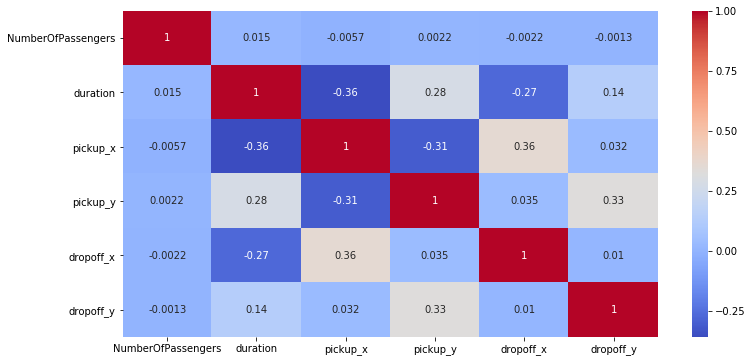

In [91]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

Maximum number of passengers on a trip :  7
Minimum number of passengers on a trip :  0
Average number of passengers on a trip :  1.665165


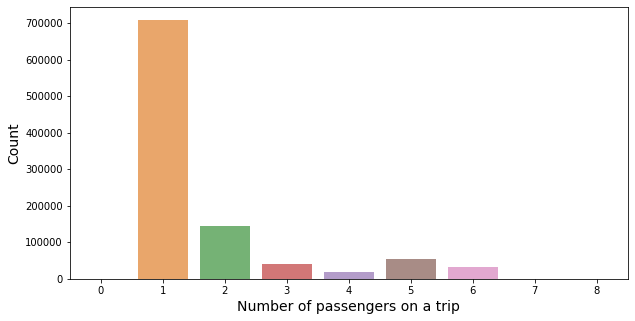

In [47]:
#Passenger Count/ Number of Pick
pass_count = X_test['NumberOfPassengers']
print("Maximum number of passengers on a trip : ", np.max(pass_count.values))
print("Minimum number of passengers on a trip : ", np.min(pass_count.values))
print("Average number of passengers on a trip : ", np.mean(pass_count.values))

f = plt.figure(figsize=(10,5))
pass_count = dataset['NumberOfPassengers'].value_counts()
sns.barplot(pass_count.index, pass_count.values, alpha=0.7)
plt.xlabel('Number of passengers on a trip', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#### Analysis of Number of Pick-ups - Training Set Data

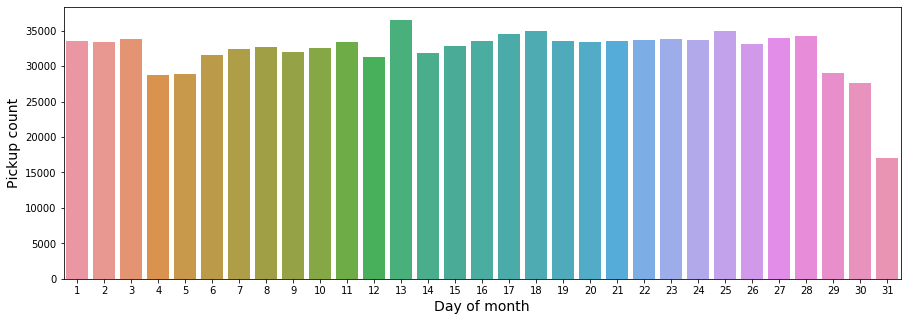

In [48]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_day', data=dataset)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

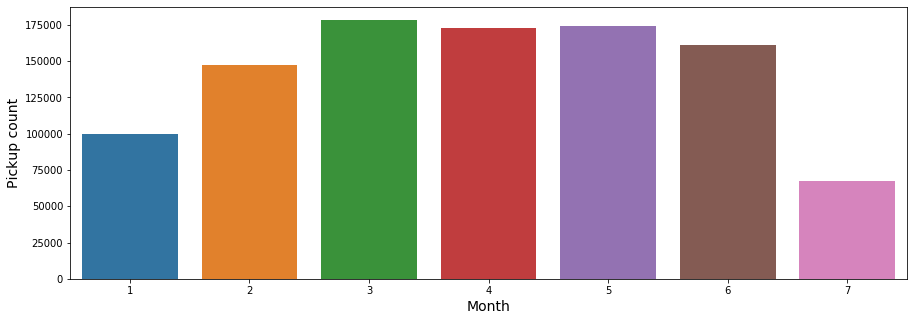

In [49]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_month', data=dataset)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

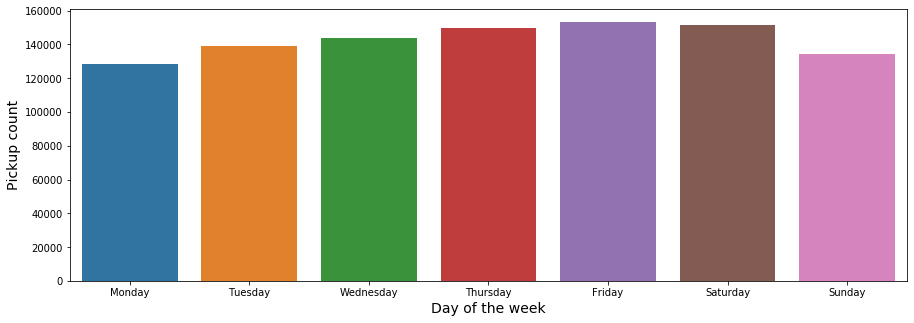

In [50]:
f = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=dataset)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

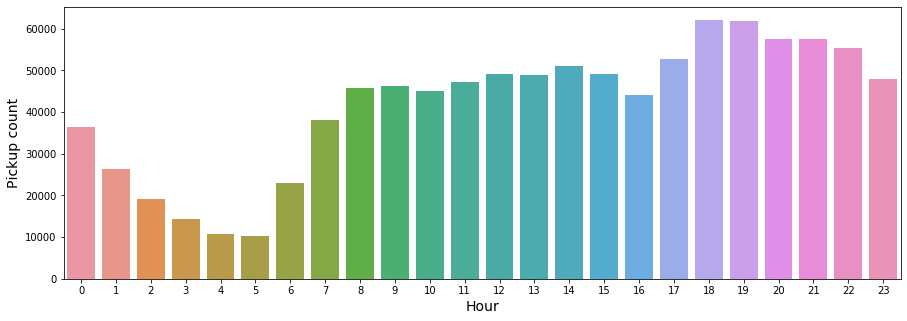

In [51]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_hour', data=dataset)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

##### The highest number of pickups are around 6pm and 7pm in the evening which makes sense as many people are on their
way to home from office.

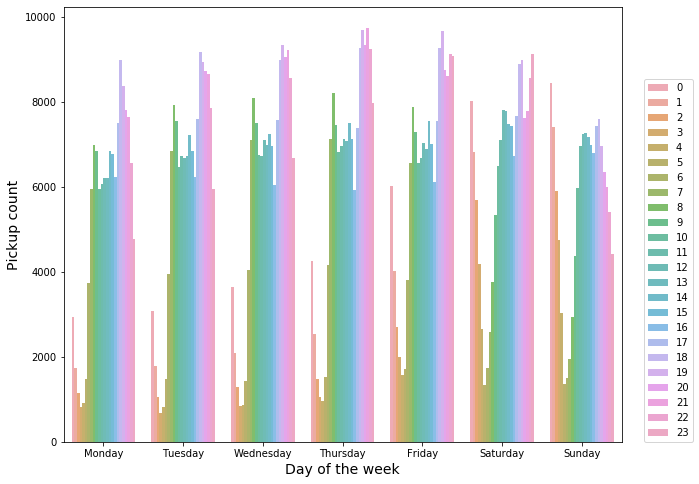

In [52]:
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=dataset, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

#### Analysis of Trip Duration

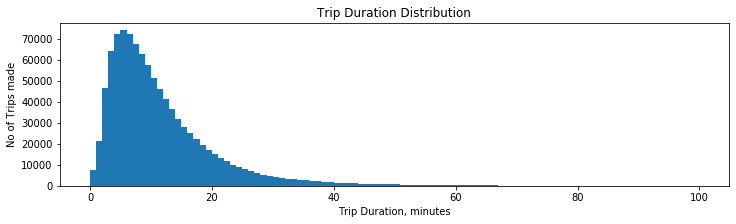

In [53]:
# Trip duration distribution, minutes
plt.figure(figsize=(12,3))
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration, minutes')
plt.ylabel('No of Trips made')
plt.hist(dataset.duration/60, bins=100)
pass

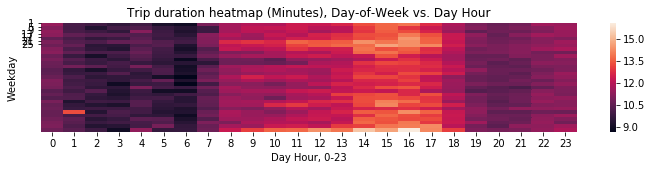

In [7]:
# Trip duration, based on hour-of-day vs. weekday
# Pickup heatmap, Day vs hour
plt.figure(figsize=(12,2))
sns.heatmap(data=pd.crosstab(dataset.pickup_day, 
                             dataset.pickup_hour, 
                             values=dataset.duration/60, 
                             aggfunc='mean',
                             ))

plt.title('Trip duration heatmap (Minutes), Day-of-Week vs. Day Hour')
plt.ylabel('Weekday') ; plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7), rotation='horizontal')
pass

C:\Users\supri\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


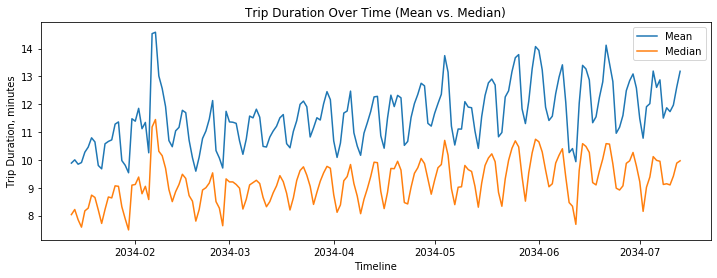

In [55]:
# Trip duration time-series by day, mean vs. median
data = dataset.groupby(dataset.pickup_datetime.dt.date).aggregate({'duration':['mean', 'median']})/60
plt.figure(figsize=(12,4))
plt.title('Trip Duration Over Time (Mean vs. Median)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Mean', 'Median'])
pass

##### Calculate Distance for Training Set Data

In [56]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [8]:
#Calculate Distance
from haversine import haversine

def calc_distance(df):
    dis_x = (df['pickup_x'], df['dropoff_x'])
    dis_y = (df['pickup_y'], df['dropoff_y'])
    return haversine(dis_x, dis_y)

In [9]:
#Calculate distance and assign new column to the dataframe.
dataset['distance'] = dataset.apply(lambda x: calc_distance(x), axis = 1)

In [10]:
#Check the type of each variable
dataset.dtypes.reset_index()

,index,0
0,pickup_datetime,datetime64[ns]
1,NumberOfPassengers,int64
2,duration,int64
3,pickup_x,float64
4,pickup_y,float64
5,dropoff_x,float64
6,dropoff_y,float64
7,pickup_day,int64
8,pickup_month,int64
9,pickup_weekday,int64


In [19]:
#Drop Datetime
dataset = dataset.drop(columns=['pickup_datetime'])

In [20]:
dataset.head()

,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_day,pickup_month,pickup_weekday,pickup_hour,distance
0,1,434,135.428113,321.190773,141.317712,321.357802,7,6,2,20,9271.570449
1,1,415,148.781291,322.565536,157.145868,337.052655,14,4,4,8,7633.901287
2,2,398,124.000006,313.347763,131.362606,300.613585,20,4,3,18,11458.434732
3,1,746,124.288413,316.495404,143.284351,334.542116,28,4,4,22,11083.130265
4,1,102,177.344861,358.087844,168.709489,363.038196,28,5,6,11,1671.830110


##### Calculate Distance for Test Set Data

In [64]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [13]:
#Calculate Distance
from haversine import haversine

def calc_distance(df):
    dis_x = (df['pickup_x'], df['dropoff_x'])
    dis_y = (df['pickup_y'], df['dropoff_y'])
    return haversine(dis_x, dis_y)

In [14]:
#Calculate distance and assign new column to the dataframe.
X_test['distance'] = X_test.apply(lambda x: calc_distance(x), axis = 1)

In [15]:
#Check the type of each variable
X_test.dtypes.reset_index()

,index,0
0,pickup_datetime,datetime64[ns]
1,NumberOfPassengers,int64
2,pickup_x,float64
3,pickup_y,float64
4,dropoff_x,float64
5,dropoff_y,float64
6,pickup_day,int64
7,pickup_month,int64
8,pickup_weekday,int64
9,pickup_hour,int64


In [21]:
#Drop Datetime
X_test = X_test.drop(columns=['pickup_datetime'])

In [22]:
X_test.head()

,NumberOfPassengers,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_day,pickup_month,pickup_weekday,pickup_hour,distance
0,2,155.108652,322.284140,148.058424,332.814003,14,3,1,8,6979.326557
1,1,146.628808,306.343423,154.284090,339.899155,20,4,3,9,9692.208681
2,2,132.028079,319.183942,149.318583,384.810789,25,1,2,0,11280.560651
3,2,175.776769,344.277029,159.039740,311.756787,1,2,2,22,3732.710936
4,2,128.428489,295.153348,126.011933,309.548102,15,4,5,23,12948.705695


## Modelling

#### Split the Data

In [18]:
from sklearn.model_selection import train_test_split

In [73]:
#traindata = dataset1.drop(columns=['duration'])
#y = dataset['duration']

#X_train, X_test, y_train, y_test = train_test_split(traindata, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [30]:
X_train = dataset.drop(columns=['duration'])
y_train = dataset['duration']

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape)

(1000000, 10) (1000000,)
(200000, 10)


In [76]:
X_train.head()

,NumberOfPassengers,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_day,pickup_month,pickup_weekday,pickup_hour,distance
0,1,135.428113,321.190773,141.317712,321.357802,7,6,2,20,9271.570449
1,1,148.781291,322.565536,157.145868,337.052655,14,4,4,8,7633.901287
2,2,124.000006,313.347763,131.362606,300.613585,20,4,3,18,11458.434732
3,1,124.288413,316.495404,143.284351,334.542116,28,4,4,22,11083.130265
4,1,177.344861,358.087844,168.709489,363.038196,28,5,6,11,1671.830110


In [25]:
X_test.head()

,NumberOfPassengers,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_day,pickup_month,pickup_weekday,pickup_hour,distance
0,2,155.108652,322.284140,148.058424,332.814003,14,3,1,8,6979.326557
1,1,146.628808,306.343423,154.284090,339.899155,20,4,3,9,9692.208681
2,2,132.028079,319.183942,149.318583,384.810789,25,1,2,0,11280.560651
3,2,175.776769,344.277029,159.039740,311.756787,1,2,2,22,3732.710936
4,2,128.428489,295.153348,126.011933,309.548102,15,4,5,23,12948.705695


### XGB Regressor

In [78]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor()

model_xgb.fit(X_train,y_train)  
y_pred = model_xgb.predict(X_test)

In [79]:
my_df = pd.DataFrame(y_pred)
my_df.to_csv (r'C:\Users\supri\OneDrive\Desktop\MSA\Machine Learning\Final Project\G_RemovedSpeed.csv', index = False, header=True)
print (my_df)

                  0
0        567.903259
1       1135.562622
2        970.382629
3        465.131958
4        529.527039
5       1920.744263
6        191.611710
7        361.538971
8        470.613922
9        944.317627
10        97.224358
11      1743.861206
12       538.996338
13       482.969238
14       270.894440
15       301.442596
16       411.657440
17       543.334412
18       495.479553
19       337.614624
20       171.058838
21      1054.497314
22       370.896545
23       990.788025
24       470.635162
25       783.627747
26       719.460266
27       703.778809
28       560.741882
29      1971.944214
...             ...
199970   575.933533
199971  2429.621826
199972  1389.864868
199973   334.877777
199974   422.642853
199975   792.094604
199976  1246.661011
199977   349.318848
199978  2573.346436
199979   629.673035
199980  1185.104492
199981   451.380707
199982  1304.624634
199983   437.167816
199984   570.815002
199985   333.200989
199986   647.666565
199987   219.536942


In [33]:
#np.sqrt(metrics.mean_squared_error(y_test,y_pred))
#248

### Improve the accuracy by trying Grid Search Hypertuning

In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [33]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.07], #so called `eta` value
              'max_depth': [7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:  4.2min finished
C:\Users\keert\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\keert\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.7966641655415854
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [83]:
test_prediction = xgb_grid.predict(X_test)

In [84]:
#test_accuracy = grid_search.score(X_test, y_test)

In [85]:
#print("Accuracy:", grid_search.score(X_test, y_test))
##Accuracy: 0.9989162057040617

In [86]:
#np.sqrt(metrics.mean_squared_error(y_test,test_prediction))
##RMSE = 242

In [87]:
my_df = pd.DataFrame(test_prediction)
my_df.to_csv (r'C:\Users\supri\OneDrive\Desktop\MSA\Machine Learning\Final Project\G_Grid_Speed_Removed.csv', index = False, header=True)
print (my_df)

                  0
0        510.861206
1       1126.514648
2        931.085144
3        569.793701
4        500.653259
5       2066.000000
6        185.174469
7        416.977783
8        473.963776
9       1167.687866
10        69.533035
11      1602.549072
12       668.949219
13       504.165558
14       230.462204
15       286.147278
16       378.894257
17       575.843201
18       457.240112
19       331.925690
20       150.068466
21      1138.487915
22       333.241882
23      1014.712219
24       515.284790
25       766.628174
26       702.898621
27       796.269165
28       463.711517
29      2034.813965
...             ...
199970   509.243378
199971  2280.042480
199972  1509.247925
199973   350.947754
199974   499.509460
199975   805.671143
199976  1436.830933
199977   458.531799
199978  2513.723877
199979   668.372437
199980  1135.879272
199981   464.172607
199982  1202.777100
199983   417.020020
199984   543.859253
199985   361.404114
199986   682.986450
199987   213.628113


In [58]:
X= X_train
y= y_train

In [76]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[20:13:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [77]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,817.154571,0.214814,817.266852,2.185220
1,764.074286,3.127391,764.258203,3.339195
2,714.918952,4.237428,715.173450,4.000446
3,674.029651,4.631295,674.324640,4.341804
4,638.716742,5.081839,639.031427,4.302331


#### <The End>